# Dataset details:
Rating -> (1-5) -> total 100,000 ratings,
users -> 943,
Movies -> 1682,

Each user have rated 20 movies,
The time stamps are unix seconds since 1/1/1970 UTC



In [143]:
# Import all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
# Read  User data 
u_rating = pd.read_csv("ml-100k/u.data", sep='\t', header=None, names =['user_id',  'movie_id', 'rating','timestamp'])
u_rating.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [145]:
u_rating.shape

(100000, 4)

In [146]:
u_rating.user_id.nunique()

943

In [147]:
u_rating.movie_id.nunique()

1682

In [148]:
u_rating.rating.nunique()

5

In [149]:
u_rating.sort_values(by="user_id")

,user_id,movie_id,rating,timestamp
66567,1,55,5,875072688
62820,1,203,4,878542231
10207,1,183,5,875072262
9971,1,150,5,876892196
22496,1,68,4,875072688
...,...,...,...,...
96823,943,427,4,888639147
70902,943,12,5,888639093
84518,943,284,2,875502192
72321,943,62,3,888640003


In [150]:
u_info = pd.read_csv("ml-100k/u.info",header=None)
u_info

,0
0,943 users
1,1682 items
2,100000 ratings


In [151]:
# Read  item data 
u_item = pd.read_csv("ml-100k/u.item", sep='|', header=None, names =['movie_id',  'movie_title' ,'release_date' , 'video_release date',
'IMDb_URL' ,'unknown' , 'Action' , 'Adventure' ,'Animation',
'Children' ,'Comedy' , 'Crime' , 'Documentary' ,'Drama' , 'Fantasy' ,
'Film_Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci_Fi' ,
'Thriller' ,'War', 'Western'] , encoding='latin-1')
u_item.head()

,movie_id,movie_title,release_date,video_release date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [152]:
u_item.shape

(1682, 24)

In [153]:
u_genre = pd.read_csv("ml-100k/u.genre", sep="|", header=None)
u_genre

,0,1
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


Total 18 genre are present out of which 17 are known - 0 is used as unknown

In [154]:
u_user = pd.read_csv("ml-100k/u.user", sep="|", header=None, names =["user_id", "age", "gender", "occupation", "zipcode"])
u_user.head()

,user_id,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [155]:
u_user.user_id.nunique()

943

<Axes: xlabel='count', ylabel='gender'>

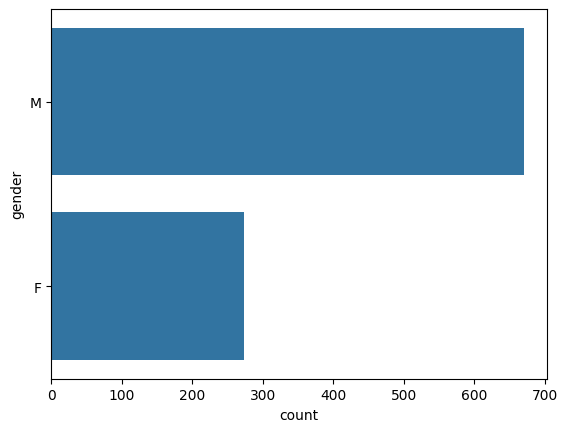

In [156]:
sns.countplot(u_user.gender)

In [157]:
u_user.gender.value_counts(normalize=True) * 100

gender
M    71.049841
F    28.950159
Name: proportion, dtype: float64

70 % users are male , 30% users are female

In [158]:
u_user.occupation.nunique()

21

<Axes: xlabel='count', ylabel='occupation'>

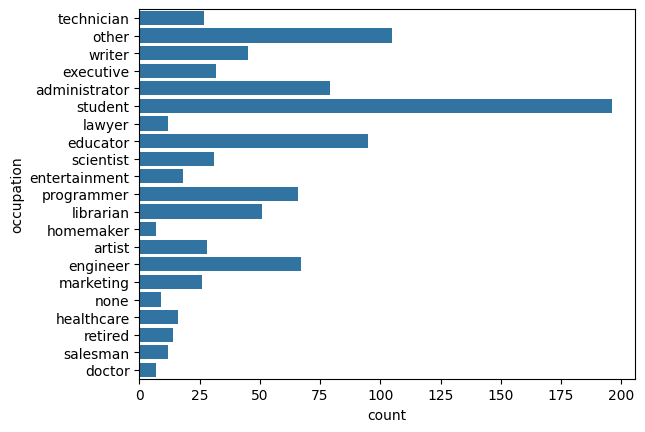

In [159]:
sns.countplot(u_user.occupation)

In [160]:
u_user.occupation.value_counts(normalize=True) * 100

occupation
student          20.784730
other            11.134677
educator         10.074231
administrator     8.377519
engineer          7.104984
programmer        6.998940
librarian         5.408271
writer            4.772004
executive         3.393425
scientist         3.287381
artist            2.969247
technician        2.863203
marketing         2.757158
entertainment     1.908802
healthcare        1.696713
retired           1.484624
lawyer            1.272534
salesman          1.272534
none              0.954401
homemaker         0.742312
doctor            0.742312
Name: proportion, dtype: float64

Most of the users are students

In [161]:
u_occupation = pd.read_csv("ml-100k/u.occupation", sep = "|")
u_occupation

,administrator
0,artist
1,doctor
2,educator
3,engineer
4,entertainment
5,executive
6,healthcare
7,homemaker
8,lawyer
9,librarian


In [162]:
u_user.zipcode.nunique() # Out of 943 user 795 are unique zip code - we can remove zip code data 

795

In [163]:
u_user = u_user.drop("zipcode", axis=1)
u_user.head()

,user_id,age,gender,occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [164]:
# change gender for M to 0 , F to 1

def encode_gender(x):
    if x == "M":
        return 0
    elif x == "F":
        return 1

u_user["gender"] = u_user["gender"].apply(lambda x :encode_gender(x) )
u_user.head()

,user_id,age,gender,occupation
0,1,24,0,technician
1,2,53,1,other
2,3,23,0,writer
3,4,24,0,technician
4,5,33,1,other


In [165]:
# pivot table make all occupation as columns
u_user_n = pd.get_dummies(u_user, columns=["occupation"]).astype(int)
u_user_n

,user_id,age,gender,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,occupation_executive,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,939,26,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
939,940,32,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,941,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
941,942,48,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


u_user_n -> is user_features -table

# Reading train and test value

In [166]:

u1_base = pd.read_csv("ml-100k/u1.base", sep="\t", header=None,  names=["userId", "movieId", "rating", "timestamp"])
u1_test = pd.read_csv("ml-100k/u1.test", sep="\t", header=None,  names=["userId", "movieId", "rating", "timestamp"])


In [168]:
u1_base

,userId,movieId,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
79995,943,1067,2,875501756
79996,943,1074,4,888640250
79997,943,1188,3,888640250
79998,943,1228,3,888640275


In [169]:
u1_test

,userId,movieId,rating,timestamp
0,1,6,5,887431973
1,1,10,3,875693118
2,1,12,5,878542960
3,1,14,5,874965706
4,1,17,3,875073198
...,...,...,...,...
19995,458,648,4,886395899
19996,458,1101,4,886397931
19997,459,934,3,879563639
19998,460,10,3,882912371


# Collaborative Filtering

# Calculate user user similarity

In [171]:
# Create a user_item matrix on train 
user_item_matrix = pd.pivot(u1_base, index="userId", columns="movieId", values="rating").fillna(0)
user_item_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,0.0,4.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
from sklearn.metrics.pairwise import cosine_similarity
u_user_sim = pd.DataFrame(cosine_similarity(user_item_matrix), index=user_item_matrix.index, columns=user_item_matrix.index)
u_user_sim

userId,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.097021,0.052469,0.021162,0.193545,0.290114,0.200438,0.097786,0.060791,0.200926,...,0.252187,0.090728,0.216186,0.139478,0.156937,0.095265,0.222958,0.158151,0.133090,0.252778
2,0.097021,1.000000,0.051348,0.084426,0.015516,0.187717,0.074479,0.023262,0.108167,0.078176,...,0.083045,0.298811,0.308608,0.403810,0.282896,0.213233,0.189257,0.132806,0.126597,0.101784
3,0.052469,0.051348,1.000000,0.145660,0.037180,0.084526,0.015718,0.086400,0.000000,0.030909,...,0.041330,0.036956,0.135750,0.063940,0.102082,0.034064,0.133720,0.083537,0.081230,0.019676
4,0.021162,0.084426,0.145660,1.000000,0.017291,0.000000,0.037566,0.046087,0.000000,0.023232,...,0.014238,0.047742,0.127305,0.118947,0.089016,0.039116,0.120521,0.135669,0.125925,0.035586
5,0.193545,0.015516,0.037180,0.017291,1.000000,0.158552,0.170890,0.157488,0.053846,0.089508,...,0.284295,0.074215,0.086345,0.063759,0.126358,0.068145,0.198118,0.142141,0.150000,0.239803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.095265,0.213233,0.034064,0.039116,0.068145,0.099518,0.075901,0.039294,0.000000,0.031693,...,0.066039,0.431154,0.258021,0.226449,0.432666,1.000000,0.087687,0.180029,0.043264,0.144250
940,0.222958,0.189257,0.133720,0.120521,0.198118,0.289962,0.263561,0.094273,0.093677,0.246078,...,0.327153,0.107024,0.187536,0.181317,0.175158,0.087687,1.000000,0.145152,0.261376,0.241028
941,0.158151,0.132806,0.083537,0.135669,0.142141,0.093607,0.017469,0.106551,0.110612,0.014989,...,0.046952,0.203301,0.288318,0.234211,0.313400,0.180029,0.145152,1.000000,0.101642,0.095120


# Calculate Item Item Similarity

In [173]:
u_item_sim  = pd.DataFrame(cosine_similarity(user_item_matrix.T), index=user_item_matrix.columns, columns=user_item_matrix.columns)
u_item_sim

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.357646,0.309390,0.373556,0.233597,0.088069,0.542065,0.410063,0.421738,0.235267,...,0.038276,0.0,0.000000,0.000000,0.038276,0.0,0.0,0.0,0.051035,0.051035
2,0.357646,1.000000,0.221600,0.419180,0.282711,0.084006,0.334544,0.285908,0.192594,0.119709,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.087781,0.087781
3,0.309390,0.221600,1.000000,0.262853,0.144386,0.078189,0.307612,0.186519,0.288698,0.147544,...,0.000000,0.0,0.000000,0.000000,0.035556,0.0,0.0,0.0,0.000000,0.106668
4,0.373556,0.419180,0.262853,1.000000,0.273416,0.099500,0.402405,0.399622,0.339125,0.184911,...,0.000000,0.0,0.104416,0.104416,0.041766,0.0,0.0,0.0,0.062650,0.083533
5,0.233597,0.282711,0.144386,0.273416,1.000000,0.017107,0.275840,0.184932,0.206313,0.039897,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.105021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000
1680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000


In [185]:
# by default taking 100 best rating
# adding all weights lead to wrong result - as so many rating are present which does not make any sense
def predict_user_based(user, item, k=20):
    if item not in user_item_matrix.columns:
        return user_item_matrix.loc[user].mean()
        
    rated_user = user_item_matrix[user_item_matrix.loc[:, item] > 0].index
    # remove the self user, as similarity == 1
    rated_user = [i for i in rated_user if i!= user]
    # if no any user have rated then return mean
    if len(rated_user) == 0 :
        return user_item_matrix.loc[user].mean()

    sim = u_user_sim.loc[user, rated_user]
    rating = user_item_matrix.loc[rated_user, item]
    if k:
        top_k = sim.nlargest(k).index
        sim = sim.loc[top_k]
        rating = rating.loc[top_k]

    num = (sim * rating).sum()
    denom = sim.sum()
    if denom == 0:
         return user_item_matrix.loc[user].mean()
    return np.round(num/denom)
        
    

In [186]:
predict_user_based(1, 2) 

np.float64(3.0)

Predicted rating for user 1, item 2 -> 3 and actual also is 3

In [187]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
pred , actual = [],[]
for i in u1_test.itertuples():
    pred.append(predict_user_based(i.userId, i.movieId) )
    actual.append(i.rating)

print(f"RMSE: {mean_squared_error(actual, pred) ** 0.05})")
    


RMSE: 1.006250737602445)


In [211]:
def predict_item_based(user, item, k = 20):
    if user not in user_item_matrix.index:
        return user_item_matrix.T.loc[item].mean()
    if item not in user_item_matrix.columns:
        return user_item_matrix.loc[user].mean()
    
    rated_item = user_item_matrix.loc[user][user_item_matrix.loc[user, :] > 0].index
    if len(rated_item) == 0:
        return user_item_matrix.T.loc[item].mean()

    sim =  u_item_sim.loc[item, rated_item]
    rating = user_item_matrix.T.loc[rated_item, user]
    if k :
        top_k = sim.nlargest(k).index
        sim = sim.loc[top_k]
        rating = rating.loc[top_k]
    num  = (sim * rating).sum()
    denom = sim.sum()

    if denom == 0:
        return user_item_matrix.T.loc[item].mean()
    return np.round(num/denom)


In [212]:
predict_item_based(1,2) 

np.float64(4.0)

Predicted rating for user 1, item 2 -> 4 but actual  is 3, using predict_item_based 

In [208]:
# Calculating RMSE
from sklearn.metrics import mean_squared_error
pred , actual = [],[]
for i in u1_test.itertuples():
    pred.append(predict_item_based(i.userId, i.movieId) )
    actual.append(i.rating)

print(f"RMSE: {mean_squared_error(actual, pred) ** 0.05})")
    


RMSE: 1.003679700465264)


RMSE for both user_based and item_based are pretty much same

# Content Filtering

In [227]:
# Creating a item features 
# calculating a dsitnace b/w 2 movies based on hamming distance
def hamming_dist(i1, i2):
    return abs(i1-i2).sum()

u_item_n = u_item.drop(columns=["video_release date","release_date","IMDb_URL","unknown", "movie_title"], axis=1)
u_item_n

,movie_id,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [241]:
rank = []
for i in range(len(u_item_n)):
    for j in range(len(u_item_n)):
        if i == j:
            continue
        rank.append([u_item_n.iloc[i, 0],u_item_n.iloc[j, 0],hamming_dist(u_item_n.loc[i].values, u_item_n.loc[j].values) ] )

u_item_features = pd.DataFrame(rank, columns=["movie_id", "candidate_id", "dist"])
u_item_features

,movie_id,candidate_id,dist
0,1,2,7
1,1,3,6
2,1,4,7
3,1,5,10
4,1,6,9
...,...,...,...
2827437,1682,1677,5
2827438,1682,1678,4
2827439,1682,1679,6
2827440,1682,1680,3


In [281]:
u_item_features_n = u_item_features.merge(u_item, on = "movie_id")[["movie_id","movie_title","candidate_id","dist"]].reset_index(drop=True)
u_item_features_n

,movie_id,movie_title,candidate_id,dist
0,1,Toy Story (1995),2,7
1,1,Toy Story (1995),3,6
2,1,Toy Story (1995),4,7
3,1,Toy Story (1995),5,10
4,1,Toy Story (1995),6,9
...,...,...,...,...
2827437,1682,Scream of Stone (Schrei aus Stein) (1991),1677,5
2827438,1682,Scream of Stone (Schrei aus Stein) (1991),1678,4
2827439,1682,Scream of Stone (Schrei aus Stein) (1991),1679,6
2827440,1682,Scream of Stone (Schrei aus Stein) (1991),1680,3


In [287]:
u_item_features_n1 = u_item_features_n.merge(
    u_item[["movie_id","movie_title"]].rename(columns={"movie_title":"candidate_movie_title"}),
    left_on="candidate_id",
    right_on="movie_id",
)
u_item_features_n1 = u_item_features_n1.drop("movie_id_y", axis =1)
u_item_features_n1 = u_item_features_n1.rename(columns={"movie_id_x":"movie_id"})

In [288]:
u_item_features_n1

,movie_id,movie_title,candidate_id,dist,candidate_movie_title
0,1,Toy Story (1995),2,7,GoldenEye (1995)
1,1,Toy Story (1995),3,6,Four Rooms (1995)
2,1,Toy Story (1995),4,7,Get Shorty (1995)
3,1,Toy Story (1995),5,10,Copycat (1995)
4,1,Toy Story (1995),6,9,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
...,...,...,...,...,...
2827437,1682,Scream of Stone (Schrei aus Stein) (1991),1677,5,Sweet Nothing (1995)
2827438,1682,Scream of Stone (Schrei aus Stein) (1991),1678,4,Mat' i syn (1997)
2827439,1682,Scream of Stone (Schrei aus Stein) (1991),1679,6,B. Monkey (1998)
2827440,1682,Scream of Stone (Schrei aus Stein) (1991),1680,3,Sliding Doors (1998)


In [305]:
# predict user similar movies 
u_item_features_n1.loc[u_item_features_n1.movie_id==1].sort_values(by="dist")

,movie_id,movie_title,candidate_id,dist,candidate_movie_title
1,1,Toy Story (1995),3,6,Four Rooms (1995)
0,1,Toy Story (1995),2,7,GoldenEye (1995)
2,1,Toy Story (1995),4,7,Get Shorty (1995)
4,1,Toy Story (1995),6,9,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
6,1,Toy Story (1995),8,9,Babe (1995)
...,...,...,...,...,...
1676,1,Toy Story (1995),1678,1681,Mat' i syn (1997)
1679,1,Toy Story (1995),1681,1682,You So Crazy (1994)
1677,1,Toy Story (1995),1679,1683,B. Monkey (1998)
1678,1,Toy Story (1995),1680,1684,Sliding Doors (1998)


can suggest above movies top 10 , GoldenEye (1995), Get Shorty (1995)

In [306]:
u_user

,user_id,age,gender,occupation
0,1,24,0,technician
1,2,53,1,other
2,3,23,0,writer
3,4,24,0,technician
4,5,33,1,other
...,...,...,...,...
938,939,26,1,student
939,940,32,0,administrator
940,941,20,0,student
941,942,48,1,librarian


# Matrix Factorization

In [312]:
from cmfrec import CMF
df = u1_base[["userId","movieId","rating"]].copy()
df.columns = ["UserId","ItemId","Rating"]

In [313]:
df

,UserId,ItemId,Rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
79995,943,1067,2
79996,943,1074,4
79997,943,1188,3
79998,943,1228,3


In [314]:
model = CMF(k = 2, lambda_ = 0.1, verbose = False, user_bias= False, item_bias=False)
model.fit(df)


Collective matrix factorization model
(explicit-feedback variant)


In [318]:
model.A_

array([[-0.45529068,  0.45054448],
       [-0.6439087 ,  0.44110182],
       [ 0.33943638,  0.7144462 ],
       ...,
       [-0.6409434 ,  0.19479688],
       [-0.6040677 , -0.23083523],
       [-0.32980457,  0.3221969 ]], shape=(943, 2), dtype=float32)

In [319]:
model.B_

array([[-1.526922  , -0.24684905],
       [-0.5278259 , -1.5149541 ],
       [-0.16217197, -1.9214597 ],
       ...,
       [ 0.38655943, -0.5766546 ],
       [ 0.05110782, -0.61139935],
       [ 0.29229948, -0.65575385]], shape=(1650, 2), dtype=float32)

In [321]:
df_test  = u1_test[["userId",	"movieId",	"rating"	]].copy()
df_test.columns = ["UserId","ItemId","Rating"]
y_true = df_test.Rating.values
y_pred = model.predict(df_test.UserId.values,df_test.ItemId.values )
print(f"RMSE : {mean_squared_error(y_true,y_pred)  ** 0.5}")

RMSE : 0.9804580201553541


RMSE is improved compared to content based and collaborative filtering

In [335]:
# Top-5 movie recommendations for user 1
user_id = 1
recommendations = model.topN(user=user_id, n=5, exclude=df_test[df_test.UserId == user_id].ItemId.values)
titles = u_item.loc[u_item.movie_id.isin(recommendations), "movie_title"].to_list()
print(titles)

['Two or Three Things I Know About Her (1966)', 'To Live (Huozhe) (1994)', 'Pather Panchali (1955)', 'Saint of Fort Washington, The (1993)', 'Grosse Fatigue (1994)']
